In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
exp_dirs = [d for d in os.listdir('.') if os.path.isdir(d) and d != '.ipynb_checkpoints']

df = pd.DataFrame()

for d in exp_dirs:
    if d.startswith('no_select'):
        temp = pd.read_parquet(os.path.join(d, 'None_results.parquet'))
        if 'log_var' in d:
            temp.loc[:, 'selection_method'] = 'log_var'
        else:
            temp.loc[:, 'selection_method'] = 'None'
    else:
        selection_method = d.split('_')[-1]
        if selection_method in ['mi', 'pca', 'rfe', 'sfs']:
            selection_method = selection_method.upper()
        temp = pd.read_parquet(os.path.join(d, f'{selection_method}_results.parquet'))
        temp.loc[:, 'selection_method'] = selection_method
    
    if 'log_var' in d:
        temp.loc[:, 'log_var_feats'] = True
    else:
        temp.loc[:, 'log_var_feats'] = False
    
    if 'rt' in d:
        temp.loc[:, 'RT'] = True
    else:
        temp.loc[:, 'RT'] = False
    
    if 'linear_svm' in d:
        temp.loc[:, 'classifier_type'] = 'linear SVM'
    elif 'rf' in d:
        temp.loc[:, 'classifier_type'] = 'random forest'

    df = df.append(temp, ignore_index=True)
    
train_cols = [c for c in df.columns if 'Train' in c]
valid_cols = [c for c in df.columns if 'Valid' in c]
test_cols = [c for c in df.columns if 'Test' in c]

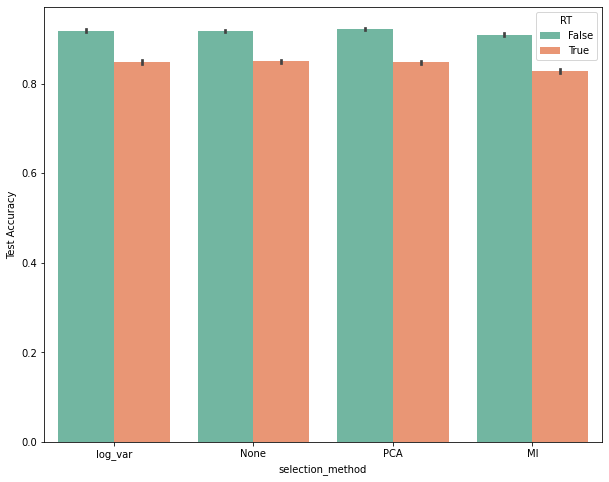

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

sns.barplot(data=df, x='selection_method', y='Test Accuracy', hue='RT', palette='Set2', ax=ax);

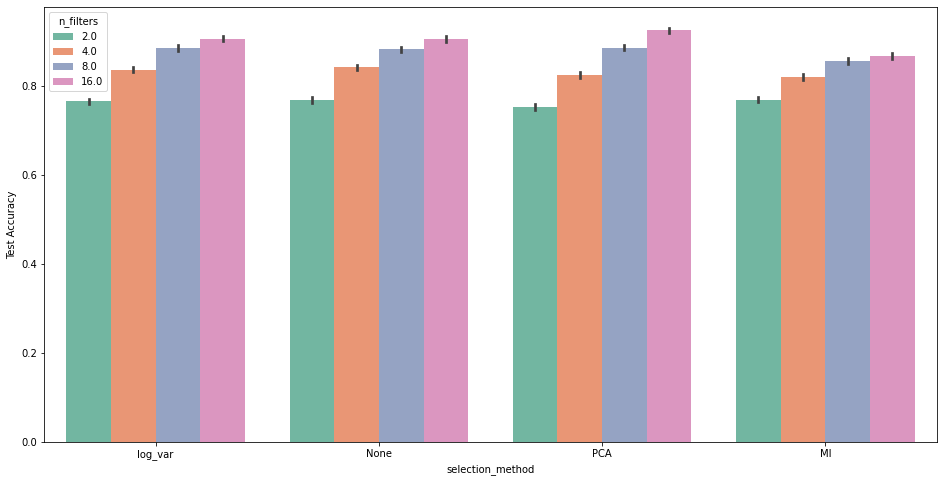

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.barplot(data=df[df['RT']], x='selection_method', y='Test Accuracy', hue='n_filters', palette='Set2', ax=ax);

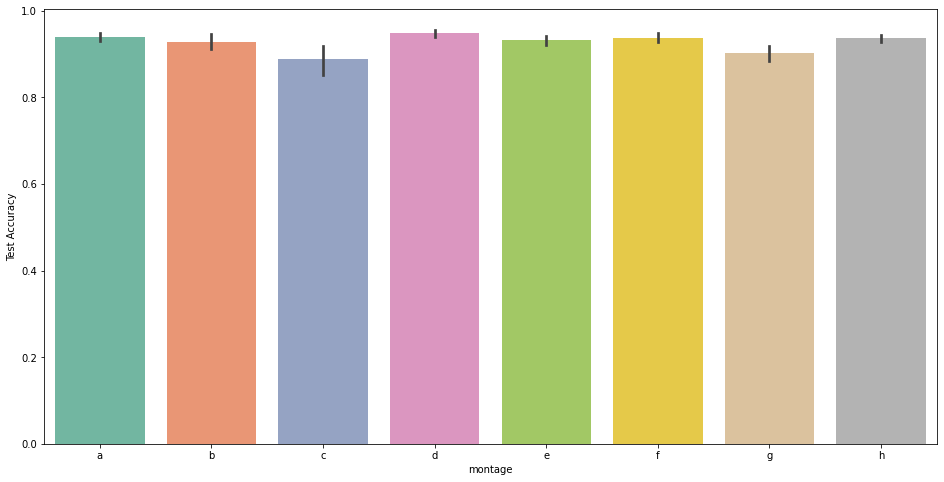

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.barplot(data=df[(df['RT']) & (df['n_filters'] == 16) & (df['selection_method'] == 'PCA')], x='montage', y='Test Accuracy', palette='Set2', ax=ax);

# 16 filters (32 log-var features) for RT window

Results over 5-fold cross-validation

In [6]:
pd.options.display.max_rows = 64

df[(df['log_var_feats']) & (df['n_filters'] == 16) & (df['RT'])].groupby(['selection_method', 'montage']).mean()[test_cols]

Test Accuracy   Test F1  Test Precision  Test Recall
selection_method montage                                                      
log_var          a             0.932835  0.931647        0.940716     0.924587
                 b             0.907943  0.903774        0.916559     0.895623
                 c             0.875057  0.873571        0.870806     0.879262
                 d             0.924089  0.925476        0.914906     0.940290
                 e             0.913212  0.911598        0.928531     0.899588
                 f             0.912612  0.914094        0.901860     0.930273
                 g             0.886770  0.888404        0.889074     0.892686
                 h             0.906606  0.907439        0.915928     0.902286

In [7]:
pd.options.display.max_rows = 64

df[(~df['log_var_feats']) & (df['n_filters'] == 16) & (df['RT'])].groupby(['selection_method', 'montage']).mean()[test_cols]

Test Accuracy   Test F1  Test Precision  Test Recall
selection_method montage                                                      
MI               a             0.880567  0.877777        0.892261     0.867679
                 b             0.883114  0.877258        0.892026     0.867473
                 c             0.838549  0.838508        0.840359     0.843055
                 d             0.892445  0.892279        0.886246     0.902053
                 e             0.878551  0.877293        0.888569     0.873549
                 f             0.872872  0.872391        0.878105     0.871960
                 g             0.836923  0.838069        0.839776     0.841362
                 h             0.864786  0.865366        0.869261     0.867075
None             a             0.934026  0.932624        0.942938     0.924587
                 b             0.904548  0.899959        0.912193     0.892268
                 c             0.872016  0.868461        0.866522     0.873608
                 d             0.924644  0.926026        0.914641     0.942029
                 e             0.913191  0.911893        0.925575     0.902829
                 f             0.909756  0.911372        0.898996     0.927314
                 g             0.884717  0.885053        0.890212     0.885783
                 h             0.905577  0.905936        0.916950     0.898590
PCA              a             0.938445  0.936885        0.952285     0.923691
                 b             0.928406  0.926537        0.932550     0.923119
                 c             0.887748  0.884106        0.891286     0.879338
                 d             0.947715  0.948226        0.937894     0.961739
                 e             0.931452  0.932003        0.932949     0.934301
                 f             0.937207  0.936683        0.940205     0.934801
                 g             0.901190  0.902210        0.897038     0.910930
                 h             0.936525  0.937563        0.938641     0.939356

# 16 filters (32 log-var features) for entire window

Results over 5-fold cross-validation

In [8]:
pd.options.display.max_rows = 64

df[(df['log_var_feats']) & (df['n_filters'] == 16) & (~df['RT'])].groupby(['selection_method', 'montage']).mean()[test_cols]

Test Accuracy   Test F1  Test Precision  Test Recall
selection_method montage                                                      
log_var          a             0.976111  0.976060        0.974469     0.978747
                 b             0.943687  0.944228        0.940542     0.950944
                 c             0.945172  0.945995        0.944202     0.949488
                 d             0.973321  0.972838        0.979513     0.967101
                 e             0.969204  0.969062        0.971447     0.967712
                 f             0.971777  0.971626        0.971915     0.972473
                 g             0.949168  0.950758        0.945798     0.957084
                 h             0.967966  0.968393        0.970992     0.966919

In [9]:
pd.options.display.max_rows = 64

df[(~df['log_var_feats']) & (df['n_filters'] == 16) & (~df['RT'])].groupby(['selection_method', 'montage']).mean()[test_cols]

Test Accuracy   Test F1  Test Precision  Test Recall
selection_method montage                                                      
MI               a             0.960657  0.960400        0.961842     0.960157
                 b             0.934613  0.935230        0.934358     0.938327
                 c             0.923968  0.917483        0.912677     0.923885
                 d             0.963244  0.962401        0.970344     0.956039
                 e             0.962779  0.962885        0.964806     0.961916
                 f             0.956539  0.956559        0.954671     0.960444
                 g             0.934061  0.935405        0.938136     0.934545
                 h             0.957254  0.958152        0.957433     0.960132
None             a             0.975204  0.975171        0.973371     0.978081
                 b             0.946659  0.947097        0.945266     0.952079
                 c             0.947966  0.948819        0.947502     0.952025
                 d             0.973043  0.972643        0.978578     0.967705
                 e             0.968106  0.968022        0.968695     0.968292
                 f             0.971790  0.971543        0.973148     0.971338
                 g             0.950045  0.951626        0.946436     0.958221
                 h             0.967954  0.968404        0.970484     0.967499
PCA              a             0.985749  0.985846        0.981703     0.990646
                 b             0.973404  0.973771        0.969894     0.978470
                 c             0.955233  0.956912        0.949856     0.965667
                 d             0.988807  0.988555        0.993837     0.983768
                 e             0.984322  0.984256        0.985300     0.983634
                 f             0.981357  0.981664        0.977112     0.986932
                 g             0.956968  0.957814        0.960095     0.956843
                 h             0.977975  0.978662        0.972193     0.985841

# 8 filters (16 log-var features) for RT window

Results over 5-fold cross-validation

In [10]:
pd.options.display.max_rows = 64

df[(df['log_var_feats']) & (df['n_filters'] == 8) & (df['RT'])].groupby(['selection_method', 'montage']).mean()[test_cols]

Test Accuracy   Test F1  Test Precision  Test Recall
selection_method montage                                                      
log_var          a             0.906414  0.903804        0.928352     0.885135
                 b             0.874363  0.870260        0.883372     0.861009
                 c             0.863203  0.861597        0.864129     0.862742
                 d             0.897638  0.898267        0.890029     0.912053
                 e             0.906296  0.904703        0.918710     0.896309
                 f             0.898741  0.899295        0.901126     0.901168
                 g             0.859829  0.860078        0.867394     0.856979
                 h             0.883433  0.885013        0.886456     0.888773

In [11]:
pd.options.display.max_rows = 64

df[(~df['log_var_feats']) & (df['n_filters'] == 8) & (df['RT'])].groupby(['selection_method', 'montage']).mean()[test_cols]

Test Accuracy   Test F1  Test Precision  Test Recall
selection_method montage                                                      
MI               a             0.869021  0.865931        0.888868     0.849454
                 b             0.843331  0.843318        0.841352     0.850399
                 c             0.843410  0.840738        0.842755     0.842668
                 d             0.883484  0.884222        0.875735     0.897609
                 e             0.877346  0.876873        0.885079     0.873839
                 f             0.857186  0.860342        0.853122     0.873477
                 g             0.831854  0.835877        0.830705     0.847493
                 h             0.842449  0.842965        0.849189     0.842118
None             a             0.902318  0.899641        0.922927     0.882152
                 b             0.876114  0.873950        0.882182     0.869148
                 c             0.861192  0.856653        0.859686     0.858106
                 d             0.900833  0.901607        0.891148     0.917271
                 e             0.897607  0.895419        0.911571     0.885618
                 f             0.892131  0.893244        0.890807     0.899071
                 g             0.855873  0.856682        0.857163     0.860249
                 h             0.880950  0.882760        0.881389     0.888938
PCA              a             0.908447  0.906097        0.927414     0.889825
                 b             0.877797  0.873949        0.883688     0.869065
                 c             0.856725  0.855933        0.856520     0.857796
                 d             0.905618  0.907830        0.891227     0.929275
                 e             0.899496  0.899276        0.908394     0.895968
                 f             0.895820  0.897269        0.892727     0.906598
                 g             0.858402  0.861442        0.861022     0.866852
                 h             0.893685  0.894520        0.895265     0.898334

# 8 filters (16 log-var features) for entire window

Results over 5-fold cross-validation

In [12]:
pd.options.display.max_rows = 64

df[(df['log_var_feats']) & (df['n_filters'] == 8) & (~df['RT'])].groupby(['selection_method', 'montage']).mean()[test_cols]

Test Accuracy   Test F1  Test Precision  Test Recall
selection_method montage                                                      
log_var          a             0.951728  0.951456        0.954139     0.950762
                 b             0.942088  0.941734        0.945579     0.940838
                 c             0.936699  0.937687        0.932290     0.945124
                 d             0.961813  0.961324        0.966972     0.957850
                 e             0.958434  0.958584        0.960690     0.958530
                 f             0.957649  0.958179        0.951959     0.966058
                 g             0.927629  0.928653        0.928732     0.930594
                 h             0.943883  0.944997        0.939710     0.952816

In [13]:
pd.options.display.max_rows = 64

df[(~df['log_var_feats']) & (df['n_filters'] == 8) & (~df['RT'])].groupby(['selection_method', 'montage']).mean()[test_cols]

Test Accuracy   Test F1  Test Precision  Test Recall
selection_method montage                                                      
MI               a             0.947378  0.947057        0.949539     0.946800
                 b             0.928825  0.928811        0.932073     0.928038
                 c             0.905049  0.906324        0.903590     0.911032
                 d             0.956657  0.956129        0.962462     0.952053
                 e             0.947636  0.947887        0.948677     0.948702
                 f             0.945800  0.946757        0.938898     0.957385
                 g             0.912740  0.914039        0.916697     0.913708
                 h             0.941275  0.942952        0.935147     0.953417
None             a             0.947996  0.947719        0.951206     0.946196
                 b             0.943008  0.942638        0.946786     0.941061
                 c             0.934526  0.935992        0.928594     0.945701
                 d             0.960937  0.960536        0.965029     0.958430
                 e             0.956728  0.957002        0.956270     0.959690
                 f             0.955355  0.956118        0.947978     0.966083
                 g             0.927011  0.928201        0.928218     0.930466
                 h             0.942730  0.944018        0.939419     0.951149
PCA              a             0.959760  0.959401        0.961254     0.959618
                 b             0.954240  0.954313        0.953103     0.957243
                 c             0.940182  0.940677        0.941719     0.941016
                 d             0.972451  0.972056        0.979566     0.965918
                 e             0.970094  0.970069        0.971916     0.969196
                 f             0.962026  0.962727        0.956618     0.970167
                 g             0.928523  0.929729        0.930502     0.931610
                 h             0.950032  0.951563        0.943445     0.961513

# 4 filters (8 log-var features) for RT window

Results over 5-fold cross-validation

In [14]:
pd.options.display.max_rows = 64

df[(df['log_var_feats']) & (df['n_filters'] == 4) & (df['RT'])].groupby(['selection_method', 'montage']).mean()[test_cols]

Test Accuracy   Test F1  Test Precision  Test Recall
selection_method montage                                                      
log_var          a             0.870138  0.864805        0.904256     0.833613
                 b             0.828838  0.823518        0.831495     0.819791
                 c             0.808630  0.804685        0.816572     0.797801
                 d             0.856694  0.854837        0.858218     0.855483
                 e             0.860132  0.857534        0.871805     0.847948
                 f             0.839712  0.842392        0.832971     0.856365
                 g             0.814898  0.817462        0.819769     0.822626
                 h             0.820184  0.818088        0.831531     0.810420

In [15]:
pd.options.display.max_rows = 64

df[(~df['log_var_feats']) & (df['n_filters'] == 4) & (df['RT'])].groupby(['selection_method', 'montage']).mean()[test_cols]

Test Accuracy   Test F1  Test Precision  Test Recall
selection_method montage                                                      
MI               a             0.851955  0.847199        0.881052     0.822412
                 b             0.814921  0.814130        0.816209     0.816509
                 c             0.796459  0.786250        0.799534     0.779604
                 d             0.843398  0.841807        0.843552     0.847367
                 e             0.844001  0.840834        0.857060     0.831139
                 f             0.828204  0.828969        0.823995     0.840563
                 g             0.791482  0.798083        0.793740     0.811422
                 h             0.798423  0.792743        0.809823     0.783698
None             a             0.863140  0.857799        0.895009     0.828819
                 b             0.842775  0.839558        0.845173     0.837360
                 c             0.817355  0.812304        0.821878     0.807646
                 d             0.858088  0.857270        0.857435     0.861280
                 e             0.856922  0.853421        0.867921     0.845117
                 f             0.851601  0.853520        0.844465     0.867677
                 g             0.822835  0.824419        0.829420     0.827072
                 h             0.828192  0.826353        0.839524     0.819209
PCA              a             0.848045  0.842789        0.874487     0.818212
                 b             0.814701  0.808968        0.820470     0.803268
                 c             0.787776  0.785024        0.795081     0.780777
                 d             0.840685  0.838410        0.841370     0.840845
                 e             0.842068  0.840554        0.851123     0.835950
                 f             0.829005  0.830037        0.825677     0.837912
                 g             0.811509  0.812504        0.824996     0.809156
                 h             0.823749  0.822848        0.831560     0.822379

# 4 filters (4 log-var features) for entire window

Results over 5-fold cross-validation

In [16]:
pd.options.display.max_rows = 64

df[(df['log_var_feats']) & (df['n_filters'] == 4) & (~df['RT'])].groupby(['selection_method', 'montage']).mean()[test_cols]

Test Accuracy   Test F1  Test Precision  Test Recall
selection_method montage                                                      
log_var          a             0.923273  0.920372        0.950206     0.895542
                 b             0.903345  0.902790        0.903686     0.908043
                 c             0.905396  0.906336        0.902764     0.912850
                 d             0.929035  0.927953        0.936627     0.922440
                 e             0.933743  0.934284        0.932817     0.939938
                 f             0.923099  0.925468        0.916248     0.938812
                 g             0.896373  0.896136        0.909651     0.885414
                 h             0.907790  0.908439        0.910427     0.910301

In [17]:
pd.options.display.max_rows = 64

df[(~df['log_var_feats']) & (df['n_filters'] == 4) & (~df['RT'])].groupby(['selection_method', 'montage']).mean()[test_cols]

Test Accuracy   Test F1  Test Precision  Test Recall
selection_method montage                                                      
MI               a             0.922689  0.919856        0.948741     0.896177
                 b             0.892273  0.891863        0.892428     0.896604
                 c             0.874076  0.856724        0.853297     0.865066
                 d             0.926142  0.924663        0.935237     0.917802
                 e             0.926356  0.927366        0.926724     0.932508
                 f             0.918011  0.920392        0.913892     0.930781
                 g             0.885575  0.885579        0.899624     0.874820
                 h             0.903382  0.904552        0.903913     0.909163
None             a             0.923569  0.920719        0.950252     0.896148
                 b             0.902159  0.902379        0.901417     0.908655
                 c             0.902523  0.902796        0.901385     0.906888
                 d             0.928751  0.927424        0.937513     0.920700
                 e             0.932332  0.932816        0.932903     0.937001
                 f             0.920885  0.923006        0.916172     0.933679
                 g             0.894964  0.894475        0.909385     0.882672
                 h             0.905791  0.906192        0.910202     0.906339
PCA              a             0.918932  0.916425        0.941440     0.896141
                 b             0.912299  0.910171        0.916839     0.908596
                 c             0.901779  0.902722        0.898212     0.909741
                 d             0.929972  0.929279        0.932895     0.928237
                 e             0.920114  0.921121        0.919959     0.926552
                 f             0.924322  0.926663        0.914946     0.941819
                 g             0.894973  0.895416        0.910385     0.884036
                 h             0.908626  0.910359        0.908587     0.915178

# 2 filters (4 log-var features) for RT window

Results over 5-fold cross-validation

In [18]:
pd.options.display.max_rows = 64

df[(df['log_var_feats']) & (df['n_filters'] == 2) & (df['RT'])].groupby(['selection_method', 'montage']).mean()[test_cols]

Test Accuracy   Test F1  Test Precision  Test Recall
selection_method montage                                                      
log_var          a             0.781048  0.776249        0.795391     0.762539
                 b             0.781403  0.778024        0.786536     0.777579
                 c             0.725953  0.724101        0.725420     0.727955
                 d             0.765735  0.762988        0.772627     0.760870
                 e             0.769120  0.757638        0.785791     0.738046
                 f             0.764338  0.767275        0.759351     0.781415
                 g             0.756357  0.756336        0.771239     0.746677
                 h             0.784781  0.781185        0.804147     0.766833

In [19]:
pd.options.display.max_rows = 64

df[(~df['log_var_feats']) & (df['n_filters'] == 2) & (df['RT'])].groupby(['selection_method', 'montage']).mean()[test_cols]

Test Accuracy   Test F1  Test Precision  Test Recall
selection_method montage                                                      
MI               a             0.780848  0.777773        0.789266     0.771339
                 b             0.783002  0.783475        0.786345     0.790215
                 c             0.739259  0.740519        0.736683     0.747780
                 d             0.767191  0.765125        0.772277     0.764952
                 e             0.778073  0.767693        0.793702     0.748817
                 f             0.771417  0.773258        0.770275     0.783972
                 g             0.757701  0.756807        0.775003     0.745583
                 h             0.784062  0.776547        0.809776     0.754785
None             a             0.779706  0.776441        0.788958     0.769521
                 b             0.781917  0.780775        0.786751     0.783886
                 c             0.732867  0.731052        0.729680     0.736121
                 d             0.768634  0.766196        0.774505     0.764952
                 e             0.776988  0.766861        0.792333     0.748411
                 f             0.769091  0.771065        0.767256     0.782786
                 g             0.759743  0.757724        0.777305     0.744566
                 h             0.786665  0.781086        0.809490     0.761645
PCA              a             0.760276  0.755717        0.771471     0.743153
                 b             0.769433  0.764972        0.777309     0.761611
                 c             0.719139  0.723313        0.715705     0.736302
                 d             0.750219  0.745422        0.757100     0.742005
                 e             0.766840  0.759068        0.773469     0.751504
                 f             0.750167  0.755954        0.741834     0.776136
                 g             0.739760  0.739083        0.751680     0.733649
                 h             0.771863  0.769113        0.791343     0.757314

# 2 filters (4 log-var features) for entire window

Results over 5-fold cross-validation

In [20]:
pd.options.display.max_rows = 64

df[(df['log_var_feats']) & (df['n_filters'] == 2) & (~df['RT'])].groupby(['selection_method', 'montage']).mean()[test_cols]

Test Accuracy   Test F1  Test Precision  Test Recall
selection_method montage                                                      
log_var          a             0.867889  0.862769        0.890925     0.840459
                 b             0.857915  0.856391        0.856701     0.860194
                 c             0.843055  0.843011        0.840684     0.850830
                 d             0.878723  0.872926        0.902504     0.850580
                 e             0.857975  0.854359        0.878086     0.836499
                 f             0.850790  0.852203        0.845499     0.863717
                 g             0.819137  0.815371        0.850340     0.788970
                 h             0.828179  0.831775        0.834264     0.833864

In [21]:
pd.options.display.max_rows = 64

df[(~df['log_var_feats']) & (df['n_filters'] == 2) & (~df['RT'])].groupby(['selection_method', 'montage']).mean()[test_cols]

Test Accuracy   Test F1  Test Precision  Test Recall
selection_method montage                                                      
MI               a             0.865606  0.860638        0.887144     0.839904
                 b             0.853915  0.853050        0.851260     0.859566
                 c             0.830210  0.825603        0.823625     0.835555
                 d             0.878156  0.872843        0.900653     0.851787
                 e             0.857686  0.854052        0.879265     0.835232
                 f             0.848545  0.850248        0.842144     0.863200
                 g             0.821002  0.817199        0.852938     0.790283
                 h             0.822163  0.826659        0.826416     0.831301
None             a             0.865606  0.860643        0.887255     0.839904
                 b             0.857042  0.855503        0.855423     0.860145
                 c             0.843074  0.843113        0.839883     0.851207
                 d             0.877866  0.872536        0.900586     0.851208
                 e             0.857079  0.853590        0.877514     0.835867
                 f             0.849679  0.851282        0.843679     0.863756
                 g             0.821291  0.817353        0.853175     0.790283
                 h             0.822163  0.826659        0.826416     0.831301
PCA              a             0.864859  0.859063        0.890464     0.833812
                 b             0.850246  0.847549        0.855624     0.844548
                 c             0.826810  0.826286        0.827584     0.831553
                 d             0.881455  0.877186        0.898815     0.860483
                 e             0.848587  0.844765        0.866925     0.830045
                 f             0.851592  0.853029        0.851202     0.861790
                 g             0.814310  0.810319        0.845482     0.784036
                 h             0.824370  0.828912        0.825798     0.836498